# Abstract figure


In [1]:
# Prework

from PIL import Image
import matplotlib.pyplot as plt

from vmatplot.output import canvas_setting, color_sampling

def merge_6_rasters(image_paths, suptitle=None):
    # Figure setting
    fig_setting = canvas_setting()
    annotate_color = color_sampling("Grey")

    # Load images
    images = [Image.open(image) for image in image_paths]

    # Use the last image's size as reference
    width_source, height_source = images[-1].size

    scaling = 1.0
    width = int(width_source / scaling)     # Width for background canvas
    height = int(height_source / scaling)   # Height for background canvas

    # Scaling factors for the images
    scaling_first_row = 1.0
    scaling_second_row = 1.0
    scaling_third_row = 1.0

    # Scaled dimensions for each row
    width_scaled_first = int(width_source * scaling_first_row)
    height_scaled_first = int(height_source * scaling_first_row)

    width_scaled_second = int(width_source * scaling_second_row)
    height_scaled_second = int(height_source * scaling_second_row)

    width_scaled_third = int(width_source * scaling_third_row)
    height_scaled_third = int(height_source * scaling_third_row)

    # Create a new image to merge the images
    result = Image.new("RGB", (3 * width, 3 * height), (255, 255, 255))  # White background

    # Calculate padding to center the images in their cells
    padding_x_first = (width - width_scaled_first) // 2
    padding_y_first = (height - height_scaled_first) // 2

    padding_x_second = (width - width_scaled_second) // 2
    padding_y_second = (height - height_scaled_second) // 2

    padding_x_third = (width - width_scaled_third) // 2
    padding_y_third = (height - height_scaled_third) // 2

    # Paste the images into the new image, all rows centered
    # First row images (resized and centered)
    result.paste(images[0].resize((width_scaled_first, height_scaled_first)), (padding_x_first, padding_y_first))  # First cell
    result.paste(images[3].resize((width_scaled_first, height_scaled_first)), (width + padding_x_first, padding_y_first))  # Second cell
    result.paste(images[6].resize((width_scaled_first, height_scaled_first)), (2 * width + padding_x_first, padding_y_first))  # Third cell

    # Second row images (resized and centered)
    result.paste(images[1].resize((width_scaled_second, height_scaled_second)), (padding_x_second, height + padding_y_second))  # First cell
    result.paste(images[4].resize((width_scaled_second, height_scaled_second)), (width + padding_x_second, height + padding_y_second))  # Second cell
    result.paste(images[7].resize((width_scaled_second, height_scaled_second)), (2 * width + padding_x_second, height + padding_y_second))  # Third cell

    # Third row images (resized and centered)
    result.paste(images[2].resize((width_scaled_third, height_scaled_third)), (padding_x_third, 2 * height + padding_y_third))  # First cell
    result.paste(images[5].resize((width_scaled_third, height_scaled_third)), (width + padding_x_third, 2 * height + padding_y_third))  # Second cell
    result.paste(images[8].resize((width_scaled_third, height_scaled_third)), (2 * width + padding_x_third, 2 * height + padding_y_third))  # Third cell

    # Create a matplotlib figure
    _, ax = plt.subplots(figsize=(fig_setting[0][0] * 2, fig_setting[0][1] * 2), dpi=fig_setting[1] * 1.5)
    params = fig_setting[2]
    plt.rcParams.update(params)
    ax.tick_params(direction="in", which="both", top=True, right=True, bottom=True, left=True)
    ax.imshow(result)

    # Set ticks at the junctions of the images
    plt.xticks([])  # Remove horizontal ticks
    plt.yticks([])  # Remove vertical ticks

    # Dividing lines
    line_color = "grey"
    plt.axhline(y=1 * height, color=line_color, linewidth=1)
    plt.axhline(y=2 * height, color=line_color, linewidth=1)
    plt.axvline(x=1 * width, color=line_color, linewidth=1)
    plt.axvline(x=2 * width, color=line_color, linewidth=1)

    if suptitle:
        plt.suptitle(suptitle, fontsize=20, y=0.925)

    plt.show()


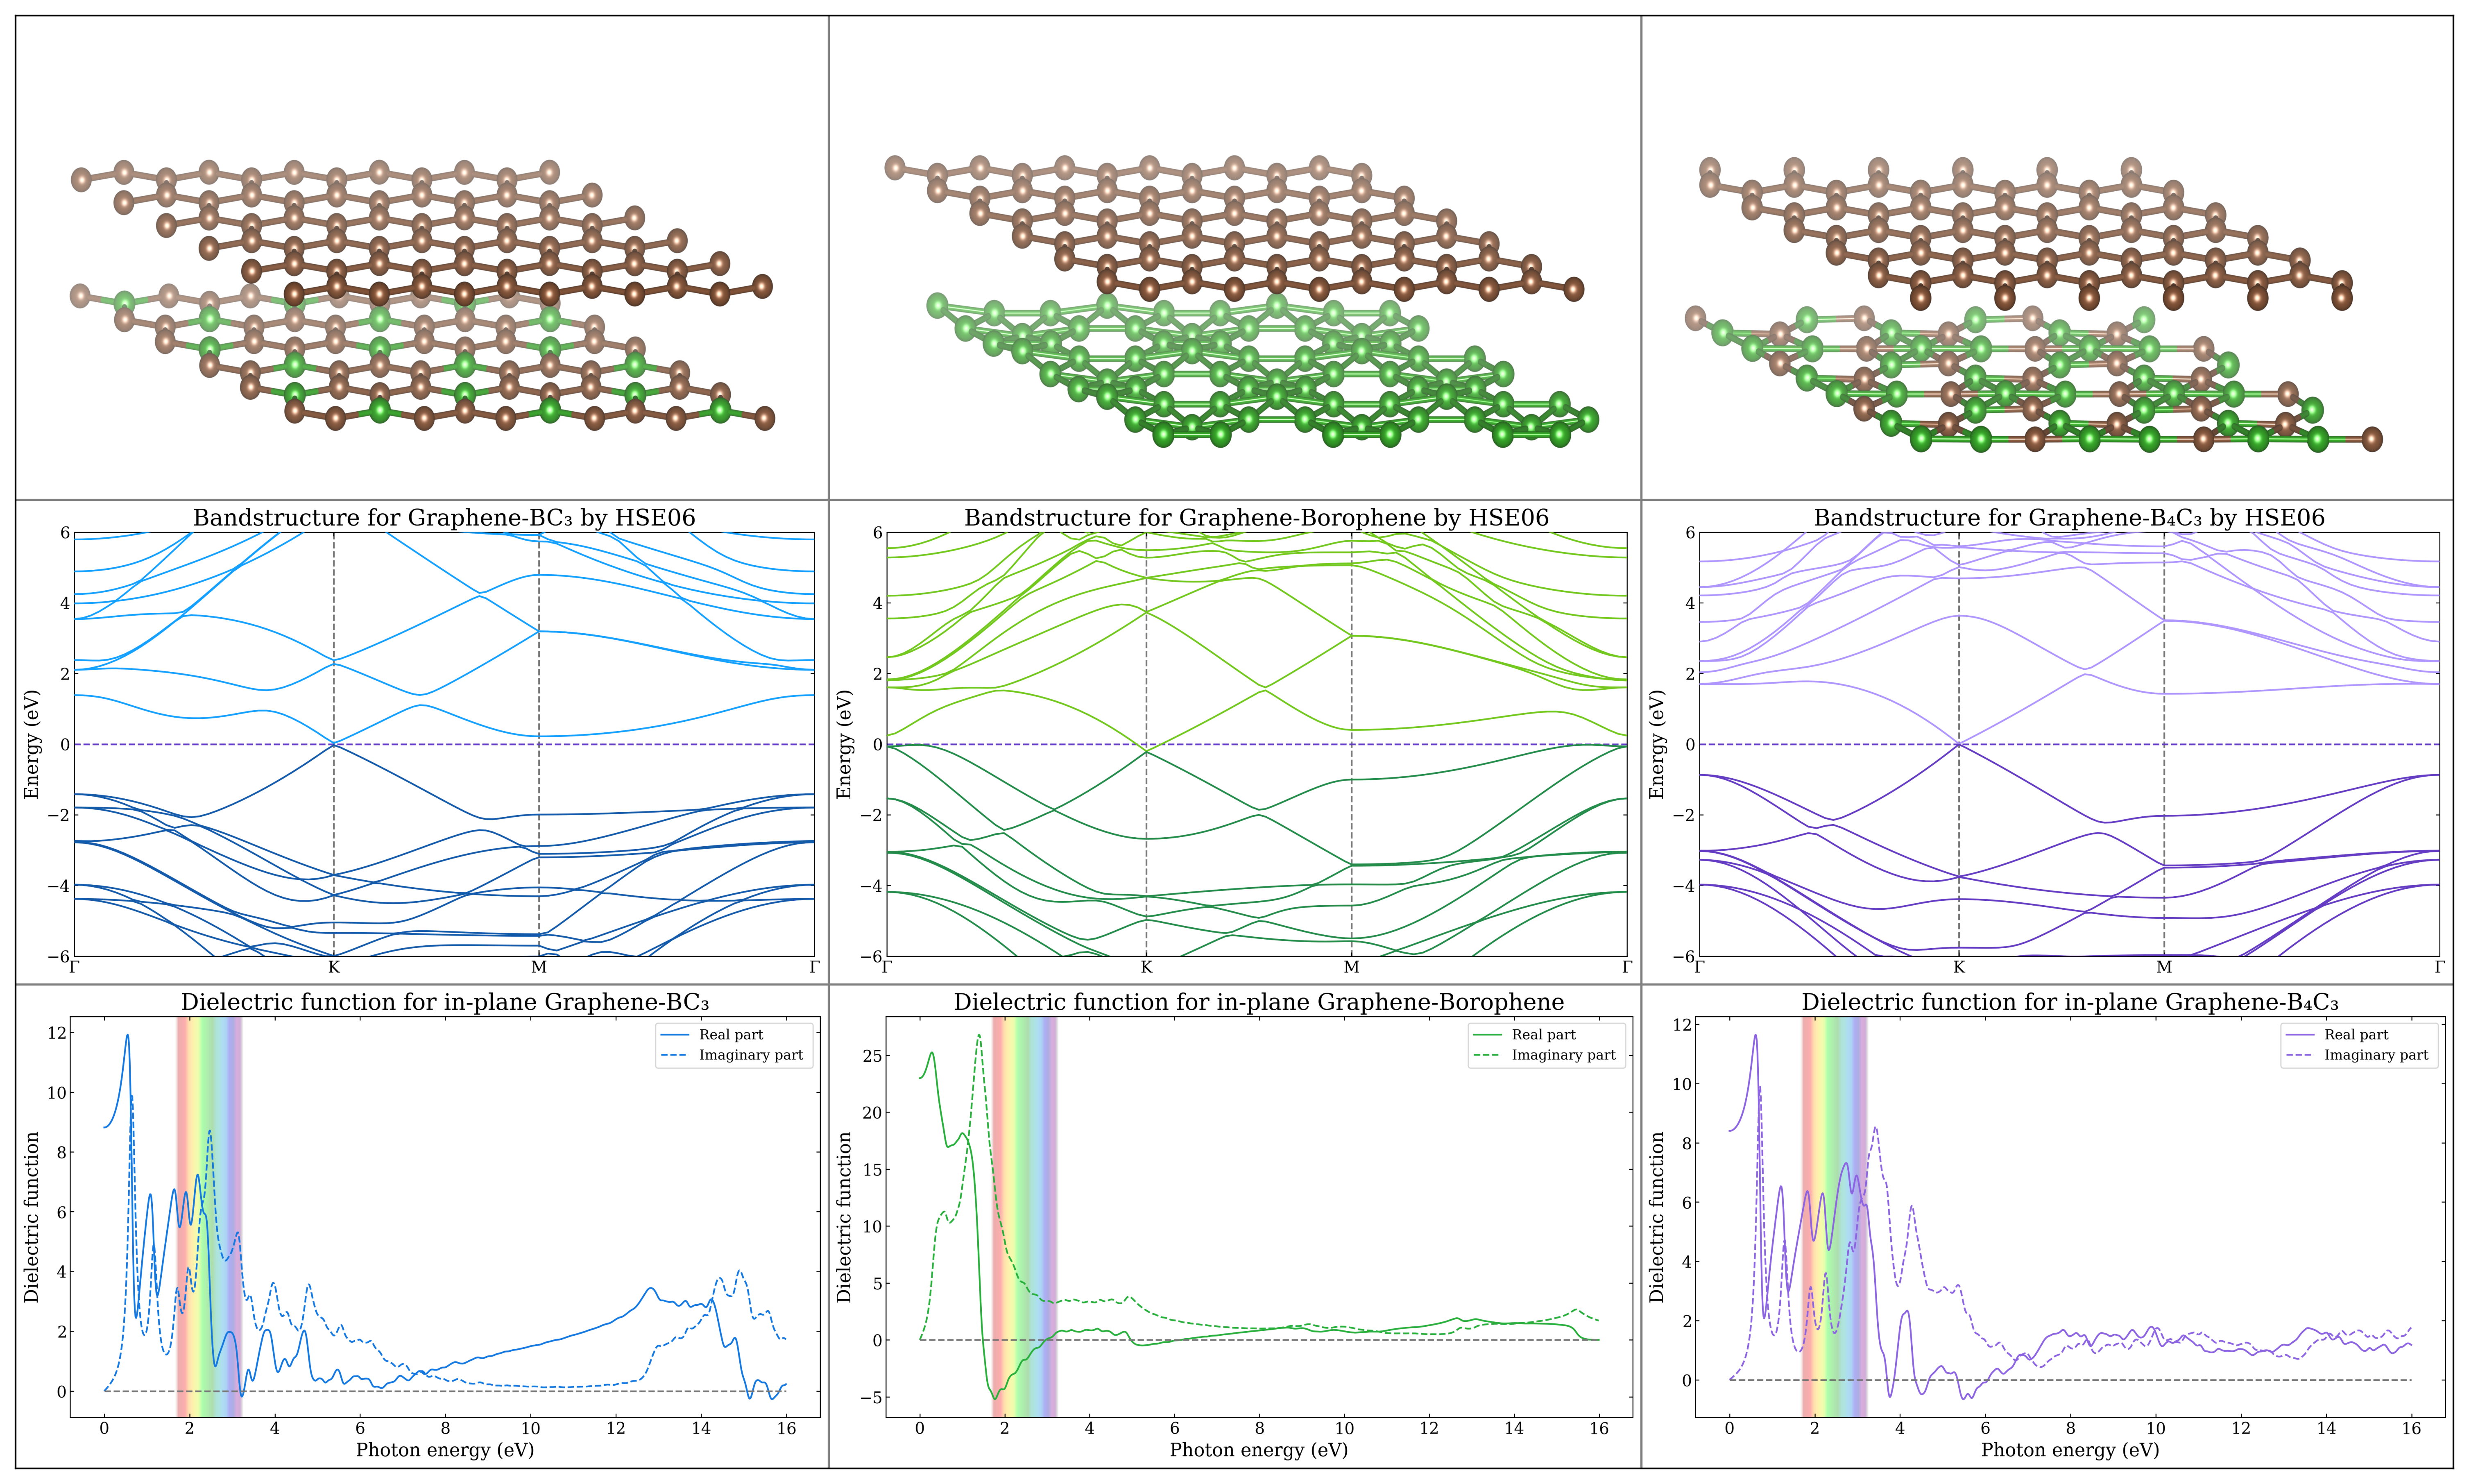

<Figure size 640x480 with 0 Axes>

In [2]:
difference_path = [
                   "0_Abstract/E_Graphene-BC3_abs.png",
                   "0_Abstract/E_Graphene-BC3_bs.png",
                   "0_Abstract/E_Graphene-BC3_die.png",

                   "0_Abstract/F_Graphene-Borophene_abs.png",
                   "0_Abstract/F_Graphene-Borophene_bs.png",
                   "0_Abstract/F_Graphene-Borophene_die.png",

                   "0_Abstract/G_Graphene-B4C3_abs.png",
                   "0_Abstract/G_Graphene-B4C3_bs.png",
                   "0_Abstract/G_Graphene-B4C3_die.png",
                   ]

merge_6_rasters(difference_path, "")
